In [1]:
getwd()

[1] "/Users/evergreen/Documents/GitHub/classification/code/__old"

In [68]:
library("abcrf")

In [3]:
version

               _                           
platform       x86_64-apple-darwin15.6.0   
arch           x86_64                      
os             darwin15.6.0                
system         x86_64, darwin15.6.0        
status                                     
major          3                           
minor          5.2                         
year           2018                        
month          12                          
day            20                          
svn rev        75870                       
language       R                           
version.string R version 3.5.2 (2018-12-20)
nickname       Eggshell Igloo              

In [4]:
R.home() #using non-anaconda build, which is more stable

[1] "/Library/Frameworks/R.framework/Resources"

# abcrf demo

In [34]:
data(snp)
summary(snp)
length(snp$modindex)
dim(snp$param)
dim(snp$sumsta)

         Length Class      Mode   
modindex 10000  factor     numeric
param        7  data.frame list   
sumsta      48  data.frame list   

[1] 10000

[1] 10000     7

[1] 10000    48

In [37]:
message("modindex")
summary(snp$modindex)
message("param")
summary(snp$param)
message("sumsta")
names(snp$sumsta)

modindex


1    2    3 
3328 3352 3320

param


       N1              N2              N3              ta       
 Min.   :  103   Min.   :  106   Min.   :  109   Min.   :   13  
 1st Qu.: 7684   1st Qu.: 7665   1st Qu.: 7668   1st Qu.: 4071  
 Median :15089   Median :15007   Median :15292   Median : 8902  
 Mean   :15137   Mean   :15015   Mean   :15167   Mean   :10019  
 3rd Qu.:22680   3rd Qu.:22594   3rd Qu.:22760   3rd Qu.:15056  
 Max.   :29999   Max.   :30000   Max.   :29999   Max.   :29785  
                                                                
       ts              N4              r        
 Min.   :  329   Min.   :  106   Min.   :0.050  
 1st Qu.:15012   1st Qu.: 7392   1st Qu.:0.280  
 Median :21168   Median :14797   Median :0.503  
 Mean   :19980   Mean   :14974   Mean   :0.505  
 3rd Qu.:25916   3rd Qu.:22451   3rd Qu.:0.733  
 Max.   :29999   Max.   :30000   Max.   :0.950  
                                 NA's   :6680   

sumsta


[1] "HP0_1"     "HP0_2"     "HP0_3"     "HM1_1"     "HM1_2"     "HM1_3"    
 [7] "HV1_1"     "HV1_2"     "HV1_3"     "HMO_1"     "HMO_2"     "HMO_3"    
[13] "FP0_1.2"   "FP0_1.3"   "FP0_2.3"   "FM1_1.2"   "FM1_1.3"   "FM1_2.3"  
[19] "FV1_1.2"   "FV1_1.3"   "FV1_2.3"   "FMO_1.2"   "FMO_1.3"   "FMO_2.3"  
[25] "NP0_1.2"   "NP0_1.3"   "NP0_2.3"   "NM1_1.2"   "NM1_1.3"   "NM1_2.3"  
[31] "NV1_1.2"   "NV1_1.3"   "NV1_2.3"   "NMO_1.2"   "NMO_1.3"   "NMO_2.3"  
[37] "AP0_1_2.3" "AP0_2_1.3" "AP0_3_1.2" "AM1_1_2.3" "AM1_2_1.3" "AM1_3_1.2"
[43] "AV1_1_2.3" "AV1_2_1.3" "AV1_3_1.2" "AMO_1_2.3" "AMO_2_1.3" "AMO_3_1.2"

In [6]:
modindex <- snp$modindex[1:500]
sumsta <- snp$sumsta[1:500,]
data1 <- data.frame(modindex, sumsta)
model.rf1 <- abcrf(modindex~., data = data1, ntree=100)
model.rf1


Call:
 abcrf(formula = modindex ~ ., data = data1, ntree = 100) 
includes the axes of a preliminary LDA

Number of simulations: 1
Out-of-bag prior error rate: 22.8%

Confusion matrix:
    1   2   3 class.error
1 156   6  22   0.1521739
2   6 123  22   0.1854305
3  28  30 107   0.3515152

In [7]:
model.rf2 <- abcrf(modindex~., data = data1, group = list(c("1","2"),"3"), ntree=100)
model.rf2


Call:
 abcrf(formula = modindex ~ ., data = data1, group = list(c("1", "2"), "3"), ntree = 100) 
includes the axes of a preliminary LDA

Number of simulations: 1
Out-of-bag prior error rate: 20%

Confusion matrix:
    g1 g2 class.error
g1 309 26  0.07761194
g2  74 91  0.44848485

In [99]:
data(snp)
modindex <- snp$modindex[1:500]
sumsta <- snp$sumsta[1:500,]
data1 <- data.frame(modindex, sumsta)
model.rf <- abcrf(modindex~., data1, ntree=100)
data(snp.obs)
predict(model.rf, snp.obs, data1, ntree=100)

  selected model votes model1 votes model2 votes model3 post.proba
1              3            7            4           89  0.9450000
2              2            7           55           38  0.8146667

In [5]:
abcrf:::abcrf.formula

function (formula, data, group = list(), lda = TRUE, ntree = 500, 
    sampsize = min(1e+05, nrow(data)), paral = FALSE, ncores = if (paral) max(detectCores() - 
        1, 1) else 1, ...) 
{
    if (!inherits(formula, "formula")) 
        stop("abcrf.formula is only for formula objects")
    if (!inherits(data, "data.frame")) 
        stop("data needs to be a data.frame object")
    if (is.na(ncores)) {
        warning("Unable to automatically detect the number of CPU cores, \n1 CPU core will be used or please specify ncores.")
        ncores <- 1
    }
    if ((!is.logical(paral)) || (length(paral) != 1L)) 
        stop("paral should be TRUE or FALSE")
    if (!is.list(group)) 
        stop("group needs to be a list")
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data"), names(mf))
    mf <- mf[c(1L, m)]
    mf[[1L]] <- as.name("model.frame")
    mf <- eval(mf, parent.frame())
    if (!is.factor(model.response(mf))) 
        stop("response should be a factor containing the model indexes")
    if (nrow(data) == 0L || is.null(nrow(data))) 
        stop("no simulation in the reference table (response, sumstat)")
    if ((!is.logical(lda)) && (length(lda) != 1L)) 
        stop("lda should be TRUE or FALSE")
    if (length(group) != 0) {
        ngroup <- length(group)
        varn <- formula[[2]]
        data[[as.character(varn)]] <- as.vector(data[[as.character(varn)]])
        allmod <- unique(data[[as.character(varn)]])
        for (k in 1:ngroup) for (l in 1:length(group[[k]])) data[[as.character(varn)]][which(data[[as.character(varn)]] == 
            group[[k]][l])] <- paste("g", k, sep = "")
        if (!setequal(allmod, unlist(group))) {
            diffe <- setdiff(allmod, unlist(group))
            for (l in 1:length(diffe)) data <- data[-which(data[[as.character(varn)]] == 
                diffe[l]), ]
        }
        data[[as.character(varn)]] <- as.factor(data[[as.character(varn)]])
    }
    if (lda) {
        model.lda <- lda(formula, data)
        data <- cbind(data, as.matrix(predict(model.lda, data)$x))
    }
    else {
        model.lda <- NULL
    }
    m <- names(match.call(expand.dots = TRUE))
    if ((!"sampsize" %in% m) && (nrow(data) <= 15)) 
        sampsize <- as.integer(sampsize/10)
    if (sampsize > nrow(data)) 
        stop("sampsize too large")
    model.rf <- ranger(formula, data, num.trees = ntree, sample.fraction = sampsize/nrow(data), 
        num.threads = ncores, keep.inbag = TRUE, importance = "impurity", 
        ...)
    class.error = vector()
    for (i in 1:nrow(model.rf$confusion.matrix)) {
        rowSum <- sum(model.rf$confusion.matrix[i, ])
        accurate <- diag(model.rf$confusion.matrix)[i]
        error <- rowSum - accurate
        class.error[i] <- error/rowSum
    }
    model.rf$confusion.matrix <- cbind(model.rf$confusion.matrix, 
        class.error)
    colnames(model.rf$confusion.matrix) <- c(paste(model.rf$forest$levels), 
        "class.error")
    model.rf$model.rf
    cl <- match.call()
    cl[[1]] <- as.name("abcrf")
    x <- list(call = cl, lda = lda, formula = formula, group = group, 
        model.rf = model.rf, model.lda = model.lda, prior.err = model.rf$prediction.error)
    class(x) <- "abcrf"
    x
}
<bytecode: 0x7fea2544f0b8>
<environment: namespace:abcrf>

# RF

In [8]:
require(ranger)

## Classification forest with default settings
ranger(Species ~ ., data = iris)

Loading required package: ranger


Ranger result

Call:
 ranger(Species ~ ., data = iris) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      150 
Number of independent variables:  4 
Mtry:                             2 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             4.67 % 

In [9]:
## Prediction
train.idx <- sample(nrow(iris), 2/3 * nrow(iris))
iris.train <- iris[train.idx, ]
iris.test <- iris[-train.idx, ]
rg.iris <- ranger(Species ~ ., data = iris.train)
pred.iris <- predict(rg.iris, data = iris.test)
table(iris.test$Species, pred.iris$predictions)

            
             setosa versicolor virginica
  setosa         17          0         0
  versicolor      0         15         0
  virginica       0          2        16

In [10]:
## Quantile regression forest
rf <- ranger(mpg ~ ., mtcars[1:26, ], quantreg = TRUE)
pred <- predict(rf, mtcars[27:32, ], type = "quantiles")
pred$predictions

quantile= 0.1 quantile= 0.5 quantile= 0.9
[1,] 21.0          24.40         32.55        
[2,] 21.0          22.80         32.40        
[3,] 13.3          15.95         30.40        
[4,] 15.2          21.00         22.80        
[5,] 13.3          14.30         19.20        
[6,] 21.0          22.80         32.40

In [11]:
## Variable importance
rg.iris <- ranger(Species ~ ., data = iris, importance = "impurity")
rg.iris$variable.importance

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    9.978058     2.545369    42.925036    43.806204

Loading required package: survival


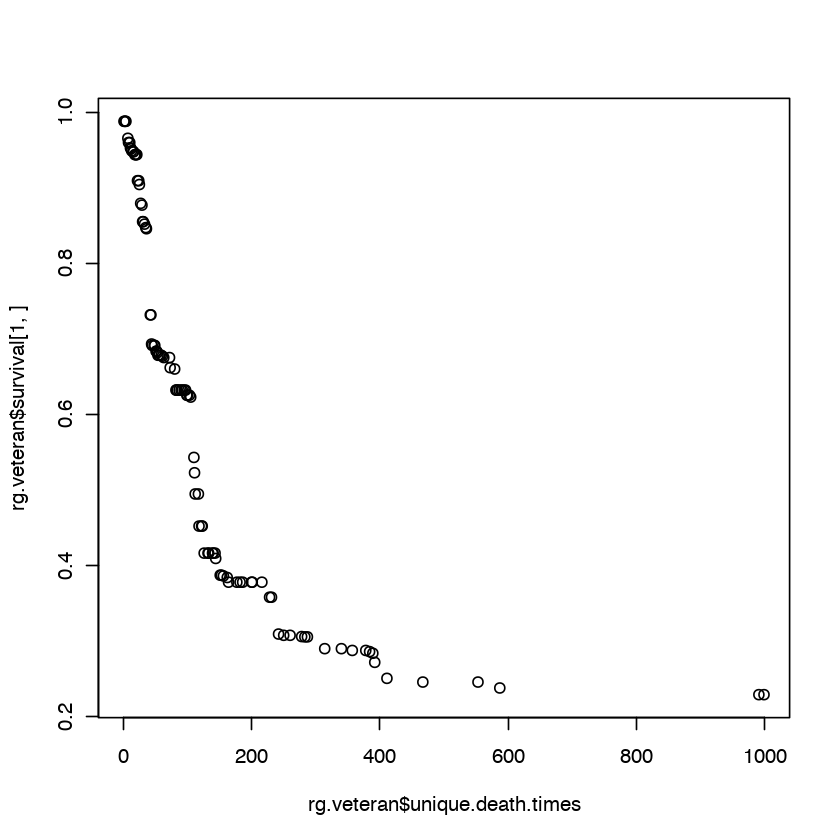

In [12]:
## Survival forest
require(survival)
rg.veteran <- ranger(Surv(time, status) ~ ., data = veteran)
plot(rg.veteran$unique.death.times, rg.veteran$survival[1,])

In [13]:
## Alternative interface
ranger(dependent.variable.name = "Species", data = iris)

Ranger result

Call:
 ranger(dependent.variable.name = "Species", data = iris) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      150 
Number of independent variables:  4 
Mtry:                             2 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             4.00 % 

In [14]:
# ## Not run: 
# ## Use GenABEL interface to read Plink data into R and grow a classification forest
# ## The ped and map files are not included
# library(GenABEL)
# convert.snp.ped("data.ped", "data.map", "data.raw")
# dat.gwaa <- load.gwaa.data("data.pheno", "data.raw")
# phdata(dat.gwaa)$trait <- factor(phdata(dat.gwaa)$trait)
# ranger(trait ~ ., data = dat.gwaa)

# ## End(Not run)

In [40]:
attributes(snp)

$names
[1] "modindex" "param"    "sumsta"

In [19]:
help(snp)

In [42]:
help(abcrf)

In [93]:
help(ranger)

# Artery Data

In [2]:
X = read.csv('../../output/X.txt',header=F)
Y = apply(read.csv('../../output/Y.txt',header=F),1,sum)

Y = factor(Y>9000)
data2 <- data.frame(X, Y)
data2

V1        V2        V3        V4        V5        V6        V7       
1  2929.0962 2929.0959 2929.0954 2929.0944 2929.0933 2929.0922 2929.0912
2  1658.5402 1658.7067 1658.7571 1658.6872 1658.6285 1658.5365 1658.3883
3  1279.5455 1279.5628 1279.5824 1279.6045 1279.6441 1279.6889 1279.7433
4  1253.8039 1253.7999 1253.8067 1253.8248 1253.8372 1253.8593 1253.9103
5  1233.9172 1233.9277 1233.9347 1233.9379 1233.9383 1233.9406 1233.9538
6  1202.3669 1202.3763 1202.3799 1202.3773 1202.3802 1202.3816 1202.3807
7  1165.8423 1165.8446 1165.8447 1165.8424 1165.8469 1165.8497 1165.8472
8  1130.7162 1130.7148 1130.7136 1130.7128 1130.7168 1130.7195 1130.7181
9  1098.2779 1098.2764 1098.2756 1098.2756 1098.2787 1098.2806 1098.2801
10 1068.6779 1068.6777 1068.6776 1068.6777 1068.6802 1068.6815 1068.6811
11 1041.6786 1041.6797 1041.6802 1041.6801 1041.6821 1041.6831 1041.6824
12 1017.0699 1017.0718 1017.0726 1017.0723 1017.0741 1017.0747 1017.0737
13  994.6932  994.6956  994.6966  994.6961  994.6977  994.6981  994.6969
14  974.4405  974.4432  974.4442  974.4436  974.4450  974.4453  974.4438
15  956.2296  956.2326  956.2337  956.2330  956.2343  956.2343  956.2328
16  939.9871  939.9902  939.9914  939.9906  939.9918  939.9917  939.9901
17  925.6381  925.6415  925.6427  925.6418  925.6429  925.6427  925.6410
18  913.1045  913.1082  913.1095  913.1085  913.1095  913.1092  913.1074
19  902.3059  902.3097  902.3111  902.3100  902.3110  902.3107  902.3088
20  893.1608  893.1648  893.1663  893.1651  893.1660  893.1657  893.1637
21  885.5886  885.5928  885.5944  885.5931  885.5940  885.5936  885.5916
22  879.5102  879.5147  879.5163  879.5150  879.5158  879.5154  879.5134
23  874.8489  874.8536  874.8552  874.8538  874.8547  874.8542  874.8521
24  871.5300  871.5349  871.5366  871.5352  871.5360  871.5356  871.5334
25  869.4816  869.4867  869.4885  869.4870  869.4878  869.4874  869.4852
26  868.6342  868.6395  868.6414  868.6398  868.6407  868.6402  868.6380
27  868.9208  868.9263  868.9283  868.9267  868.9276  868.9271  868.9249
28  870.2772  870.2829  870.2850  870.2833  870.2842  870.2837  870.2814
29  872.6414  872.6473  872.6495  872.6478  872.6487  872.6481  872.6459
30  875.9541  875.9603  875.9626  875.9608  875.9617  875.9612  875.9589
   V8        V9        V10       Y    
1  2929.0903 2929.0897 2929.0894 TRUE 
2  1658.2525 1658.0376 1657.7735 TRUE 
3  1279.7489 1279.6423 1279.4628 TRUE 
4  1253.9264 1253.8883 1253.8126 TRUE 
5  1233.9667 1233.9699 1233.9660 TRUE 
6  1202.3927 1202.4127 1202.4369 TRUE 
7  1165.8569 1165.8761 1165.9002 TRUE 
8  1130.7253 1130.7381 1130.7533 TRUE 
9  1098.2860 1098.2932 1098.3005 TRUE 
10 1068.6864 1068.6902 1068.6928 TRUE 
11 1041.6874 1041.6893 1041.6893 TRUE 
12 1017.0784 1017.0791 1017.0776 TRUE 
13  994.7012  994.7011  994.6983 TRUE 
14  974.4479  974.4469  974.4430 TRUE 
15  956.2365  956.2348  956.2299 TRUE 
16  939.9936  939.9912  939.9854 TRUE 
17  925.6442  925.6412  925.6347 TRUE 
18  913.1104  913.1069  913.0996 FALSE
19  902.3115  902.3075  902.2996 FALSE
20  893.1663  893.1618  893.1532 FALSE
21  885.5939  885.5890  885.5799 FALSE
22  879.5155  879.5102  879.5005 FALSE
23  874.8541  874.8485  874.8383 FALSE
24  871.5352  871.5292  871.5185 FALSE
25  869.4869  869.4805  869.4693 FALSE
26  868.6395  868.6328  868.6211 FALSE
27  868.9262  868.9192  868.9070 FALSE
28  870.2827  870.2753  870.2627 FALSE
29  872.6470  872.6393  872.6262 FALSE
30  875.9599  875.9519  875.9384 FALSE

In [3]:
model.rf1 <- abcrf(Y~., data = data2, ntree=100)
model.rf1

Warning message in lda.default(x, grouping, ...):
“variables are collinear”


Call:
 abcrf(formula = Y ~ ., data = data2, ntree = 100) 
includes the axes of a preliminary LDA

Number of simulations: 1
Out-of-bag prior error rate: 3.3333%

Confusion matrix:
      FALSE TRUE class.error
FALSE    13    0  0.00000000
TRUE      1   16  0.05882353

In [36]:
help(abcrf)

In [61]:
s = seq(-.9,.9,.1)
Data.healthy=data.frame(matrix(ncol = 80, nrow = 1))
n=0
for(i in sapply(s,function(x)paste("tmp/s=", format(x, nsmall = 2),",diam_narrow=0.000000.csv",sep=""))){
    n=n+1
    x=read.csv(i,header=FALSE)
    stopifnot(dim(healthydata)[2]==length(c(data.matrix(x))))
    Data.healthy[n,]=c(data.matrix(x))
}
                
Data.sick=data.frame(matrix(ncol = 80, nrow = 1))
n=0
for(i in sapply(s,function(x)paste("tmp/s=", format(x, nsmall = 2),",diam_narrow=0.000000.csv",sep=""))){
    n=n+1
    x=read.csv(i,header=FALSE)
    stopifnot(dim(healthydata)[2]==length(c(data.matrix(x))))
    Data.sick[n,]=c(data.matrix(x))
}

In [94]:
Data.sick$healthy=0
Data.healthy$healthy=1

data3=rbind(Data.healthy,Data.sick)
data3$healthy=factor(data3$healthy)

In [95]:
model.rf3 <- abcrf(healthy~., data = data3, ntree=100,lda=FALSE)
model.rf3


Call:
 abcrf(formula = healthy ~ ., data = data3, lda = FALSE, ntree = 100) 
Number of simulations: 1
Out-of-bag prior error rate: 100%

Confusion matrix:
   0  1 class.error
0  0 19           1
1 19  0           1

In [77]:
unclass(model.rf3)

$call
abcrf(formula = healthy ~ ., data = data3, lda = FALSE, ntree = 100)

$lda
[1] FALSE

$formula
healthy ~ .

$group
list()

$model.rf
Ranger result

Call:
 ranger(formula, data, num.trees = ntree, sample.fraction = sampsize/nrow(data),      num.threads = ncores, keep.inbag = TRUE, importance = "impurity",      ...) 

Type:                             Classification 
Number of trees:                  100 
Sample size:                      38 
Number of independent variables:  80 
Mtry:                             8 
Target node size:                 1 
Variable importance mode:         impurity 
Splitrule:                        gini 
OOB prediction error:             100.00 % 

$model.lda
NULL

$prior.err
[1] 1


In [84]:
data4=data3[sample(nrow(data3)),]
training=data4[1:26,]
test=data4[27:38,]

In [98]:
model.rf4 <- abcrf(healthy~., data = training,lda=FALSE)
predict(model.rf4, test, training, ntree=100)

   selected model votes model1 votes model2 post.proba
1            TRUE           43          457     0.7610
2            TRUE          144          356     0.2870
3           FALSE          402           98     0.0565
4            TRUE          114          386     0.0615
5           FALSE          468           32     0.9285
6           FALSE          417           83     0.7145
7           FALSE          425           75     0.6345
8           FALSE          484           16     0.9385
9            TRUE          214          286     0.3770
10           TRUE           31          469     0.8310
11           TRUE          214          286     0.3770
12          FALSE          453           47     0.8185

In [106]:
require(ranger)
model = ranger(healthy ~ ., data = training)
pred <- predict(model, data = test)
table(test$healthy, pred$predictions)

       
        FALSE TRUE
  FALSE     0    5
  TRUE      6    1

In [ ]:
data(snp)